# R による単回帰分析

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import pyper

## データの作成

仮想的に 100名の身長・体重データを作成し、身長を独立変数、体重を従属変数とした単回帰分析を行う。

データの作成は numpy.random の 正規分布生成関数を用いる。

In [9]:
# 身長データ： 平均値 171.7 cm, 標準偏差 5.6 cm
x = np.random.normal(171.7, 4.69, 100)
x.sort()
xdelta = np.random.randn(100) * 3.07
x = x + xdelta

# 体重データ： 平均値 64.0 kg, 標準偏差 8.4 kg
y = np.random.normal(64.0, 7.03, 100)
y.sort()
ydelta = np.random.randn(100) * 4.60
y = y + ydelta

## データを散布図により確認

身長・体重間の散布図を描く。

In [10]:
%matplotlib inline

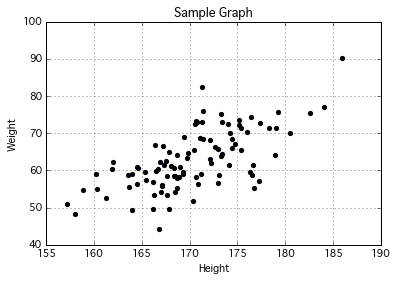

In [23]:
plt.scatter(x, y, marker='.', linewidths=3)
plt.grid(True)
plt.title('Sample Graph')
plt.xlabel('Height')
plt.ylabel('Weight')

## R を用いて分析するためにデータを整形

データ解析ライブラリ pandas を用いて、R 用にデータを整形する。

In [24]:
df_dict = {'X': x, 'Y': y}
df = pandas.DataFrame(df_dict)
df.head()

,X,Y
0,157.193907,50.840044
1,161.269620,52.714039
2,166.167810,49.639690
3,166.271387,53.323267
4,163.990227,49.424975


## R による単回帰分析

Python から R を動作させるためのライブラリ pyper を用いて、R の lm 関数を起動する。

R の分析結果を Python のオブジェクトとして扱うには、 get() 関数を用い、単回帰分析の係数と切片を得る。

In [37]:
r = pyper.R(use_pandas='True')

r.assign('df', df)
r("result <- lm(Y~X, data=df)")

print("----- Result from R/lm -----")
print(r("result"))
print("---------------------------------")

val = r.get("result['coefficients']")
print(val)

a = val['coefficients'][1]
b = val['coefficients'][0]

print("----- Values in Python -----")
print("a = {0}, b = {1}".format(a, b))
print("---------------------------------")

----- Result from R/lm -----
try({result})

Call:
lm(formula = Y ~ X, data = df)

Coefficients:
(Intercept)            X  
  -100.5499       0.9597  


---------------------------------
{'coefficients': array([-100.54988107,    0.95968435])}
----- Values in Python -----
a = 0.959684347398565, b = -100.549881072498
---------------------------------


## 散布図に回帰直線を追加

得られた回帰モデルの係数、切片の値を用いて、散布図に回帰直線を加える。

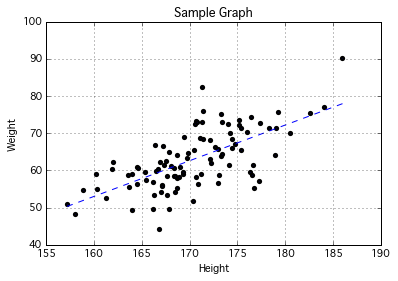

In [21]:
xesti = np.arange(min(x), max(x)+1, 1)
yesti = xesti * a + b
plt.scatter(x, y, marker='.', linewidths=3)
plt.plot(xesti, yesti, '--')
plt.grid(True)
plt.title('Sample Graph')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.savefig('abc.pdf')